# Problem Statement –
Perform Sentiment Analysis in the network graph using RNN.

In [1]:
# Name : Rhutuja Vishwanath Patil
# Batch : B
# Roll No.: 2447029 

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.text import Tokenizer

In [7]:
vocab_size = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [8]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [21]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

model.summary()

C:\Users\rhutu\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)

Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 97ms/step - accuracy: 0.9174 - loss: 0.2149 - val_accuracy: 0.8568 - val_loss: 0.3195
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.9451 - loss: 0.1554 - val_accuracy: 0.8708 - val_loss: 0.4297


In [22]:
word_index = imdb.get_word_index()
index_word = {v+3: k for k, v in word_index.items()}
index_word[0], index_word[1], index_word[2], index_word[3] = '<PAD>', '<START>', '<UNK>', '<UNUSED>'

def decode_review(text):
    return ' '.join([index_word.get(i, '?') for i in text])


In [12]:
custom_reviews = [
    "The movie was fantastic! I loved it.",
    "It was a boring and dull movie.",
    "I really enjoyed the film, very emotional.",
    "Worst acting ever, such a waste of time.",
    "An excellent movie with a powerful message."
]

In [13]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(custom_reviews)
custom_seq = tokenizer.texts_to_sequences(custom_reviews)
custom_pad = pad_sequences(custom_seq, maxlen=max_len)


In [24]:
preds = model.predict(custom_pad)
pred_labels = ['positive' if p > 0.5 else 'negative' for p in preds]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 468ms/step


In [25]:
G = nx.Graph()

for idx, review in enumerate(custom_reviews):
    words = review.lower().split()
    for i in range(len(words)-1):
        G.add_node(words[i], label=f"{words[i]} ({pred_labels[idx]})", sentiment=pred_labels[idx])
        G.add_node(words[i+1], label=f"{words[i+1]} ({pred_labels[idx]})", sentiment=pred_labels[idx])
        G.add_edge(words[i], words[i+1])

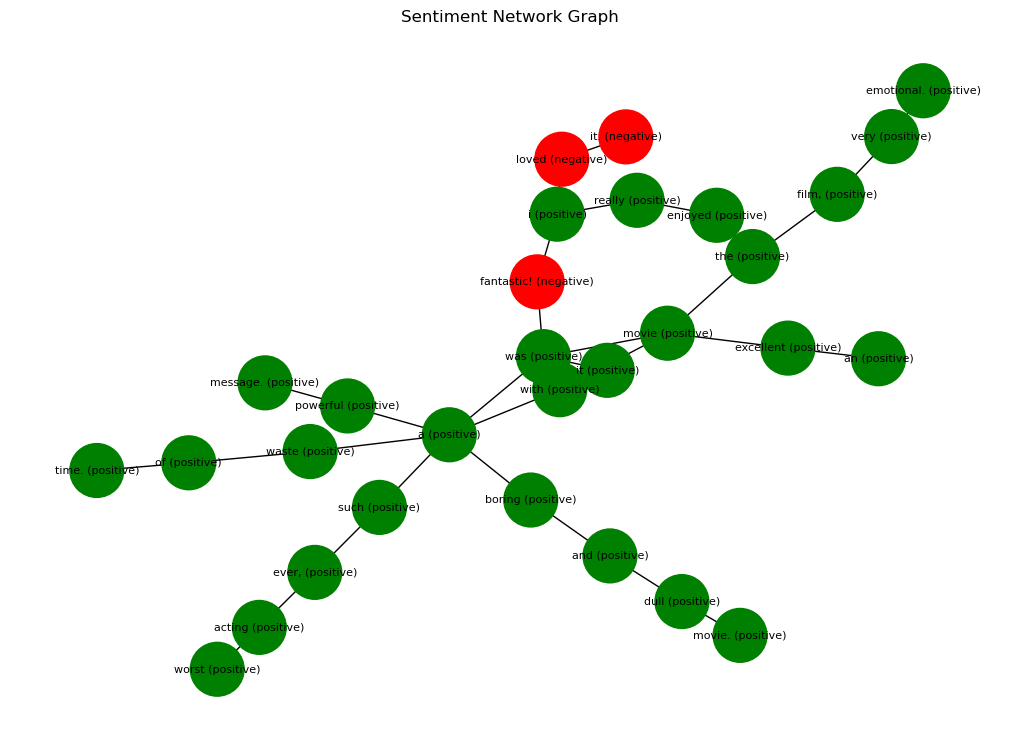

In [26]:
colors = ['green' if G.nodes[n]['sentiment'] == 'positive' else 'red' for n in G.nodes()]
labels = nx.get_node_attributes(G, 'label')

# 10. Draw the sentiment network graph
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, labels=labels, node_color=colors, font_size=8, node_size=1500)
plt.title("Sentiment Network Graph")
plt.show()

In [27]:
color_map = []
for node in G.nodes():
    sentiment = G.nodes[node].get('sentiment', 'Neutral')
    if sentiment == 'Positive':
        color_map.append('green')
    elif sentiment == 'Negative':
        color_map.append('red')
    else:
        color_map.append('gray')

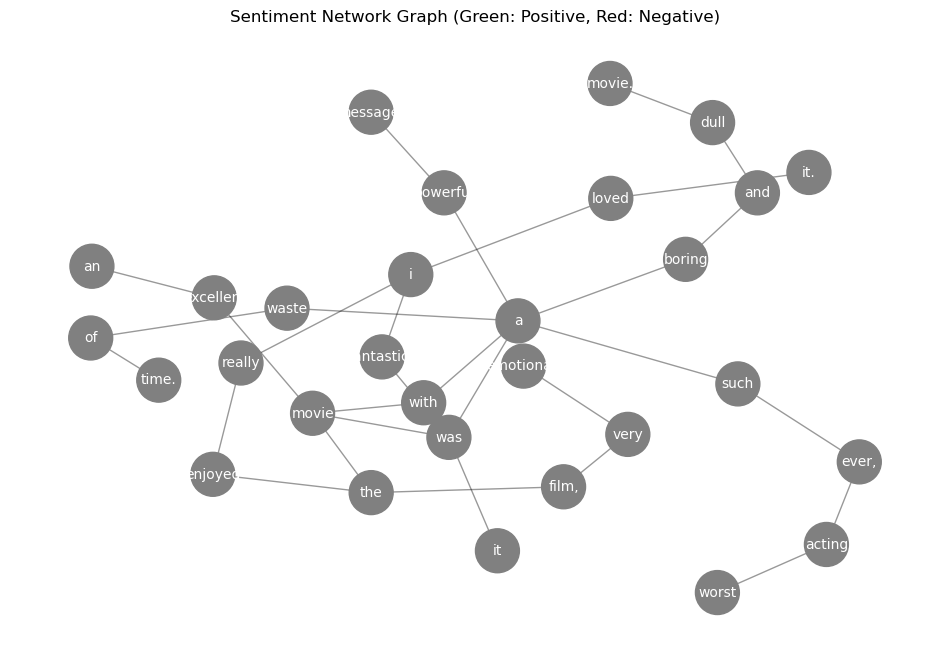

In [28]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=1000)
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='white')
plt.title("Sentiment Network Graph (Green: Positive, Red: Negative)")
plt.axis('off')
plt.show()

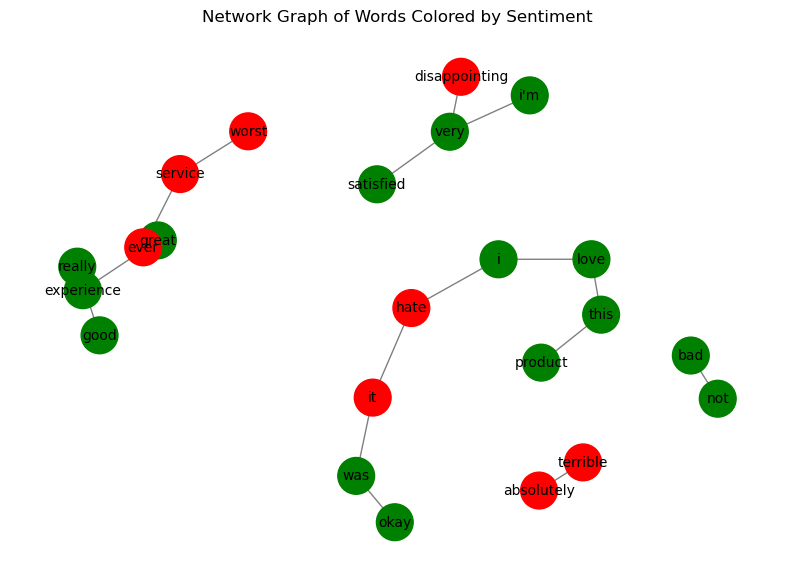

In [3]:
# Ensure you collect all nodes only once, with their sentiment
node_colors = []
for node in G.nodes():
    # Search sentiment from any sentence containing this node
    found = False
    for i, text in enumerate(data['text']):
        if node in text.lower().split():
            sentiment = data['label'][i]
            color = 'green' if sentiment == 1 else 'red'
            node_colors.append(color)
            found = True
            break
    if not found:
        node_colors.append('gray')  # fallback if not found in any sentence

# Now draw with corrected color list
plt.figure(figsize=(10, 7))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=700)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.title("Network Graph of Words Colored by Sentiment")
plt.axis('off')
plt.show()
